<a href="https://colab.research.google.com/github/aln1024/aln1024.github.io/blob/master/911_calls_time_spent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Amy Nichols
# Professor Parker
# ES96
# Originally Created March 9, 2022
# Copy created: May 13, 2022

# Data sheets used (link): 911_calls_time_spent_data.xlsx (https://docs.google.com/spreadsheets/d/13T45hkFY05nE21GEI4-lBBxb09Im95hC/edit?usp=sharing&ouid=107265280416651540338&rtpof=true&sd=true) 

# Code and Data Set-up

In [ ]:
## GET DATA FROM: 911_calls_time_spent_data ##
df = pd.read_excel('/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene/911_calls_time_spent_data.xlsx', sheet_name='Compiled')
df = df[df.columns[:9]] # Isolate relevant columns
df.head()

,Call_Reason,Self,Disp,Total,%,Avg._Arrive,Avg._Time_@_Scene,Year,Region
0,Unknown,0.0,1071.0,1071.0,6.9,88.93,109.38,2008.0,A
1,209A SERVICE,0.0,205.0,205.0,1.3,10.19,27.03,2008.0,A
2,Accident with Injuries,0.0,317.0,317.0,2.0,71.05,129.38,2008.0,A
3,Property Damage Accident,0.0,729.0,729.0,4.7,83.21,132.30,2008.0,A
4,SCHOOL BUS ACCIDENT,0.0,8.0,8.0,< 1,8.38,40.71,2008.0,A


In [ ]:
## SEPARATE DATA BETWEEN SPRINGFIELD AND THE NORTH END ##
total_A = df.loc[(df['Call_Reason'] == 'TOTAL') & (df['Region'] == 'A')].reset_index(drop = True) # Total values in the North End 
total_C = df.loc[(df['Call_Reason'] == 'TOTAL') & (df['Region'] == 'C')].reset_index(drop = True) # Total values in the City of Springfield




## VARIABLES + SET DATA TYPES ##
years = pd.to_numeric(total_C['Year'], downcast="integer") # Access data from the Year column; Springfield was used, but total_A['Year'] and total_C['Year'] are the same; cast as an integer

# Springfield
totalC = pd.to_numeric(total_C['Total'], downcast="float") # Access data from the Total column for Springfield; cast as a float
timeSpentC = pd.to_numeric(total_C['Avg._Time_@_Scene'], downcast="float") # Access data from the Avg._Time_@_Scene column for Springfield; cast as a float
timeArriveC = pd.to_numeric(total_C['Avg._Arrive'], downcast="float") # Access data from the Avg._Arrive column for Springfield; cast as a float

# North End
totalA = pd.to_numeric(total_A['Total'], downcast="float") # Access data from the Total column for the North End; cast as a float
timeSpentA = pd.to_numeric(total_A['Avg._Time_@_Scene'], downcast="float") # Access data from the Avg._Time_@_Scene column for the North End; cast as a float
timeArriveA = pd.to_numeric(total_A['Avg._Arrive'], downcast="float") # Access data from the Avg._Arrive column for the North End; cast as a float




## PRINT FOR QUALITY CHECK ##
#print('________ total_A ________\n')
#print(total_A) # Region column should only contain 'A'; 12 rows
#print('\n\n________ total_C ________\n')
#print(total_C)  # Region column should only contain 'C'; 12 rows

#print('\n\n________ years ________\n')
#print(years) # Should show 2008-2019; Name: Year, dtype: int16

#print('\n\n________ totalA ________\n')
#print(totalA) # Should show 155551.0 as first item; Name: Total, dtype: float32
#print('\n\n________ totalC ________\n')
#print(totalC) # Should show 192253.0 as first item; Name: Total, dtype: float32

#print('\n\n________ timeSpentA ________\n')
#print(timeSpentA) # Should show 94.05 as first item; Name: Avg._Time_@_Scene, dtype: float32
#print('\n\n________ timeSpentC ________\n')
#print(timeSpentC) # Should show 92.27 as first item; Name: Avg._Time_@_Scene, dtype: float32

#print('\n\n________ timeArriveA ________\n')
#print(timeArriveA) # Should show 64.45 as first item; Name: Avg._Arrive, dtype: float32
#print('\n\n________ timeArriveC ________\n')
#print(timeArriveC) # Should show 60.69 as first item; Name: Avg._Arrive, dtype: float32

# 911 Calls from the North End

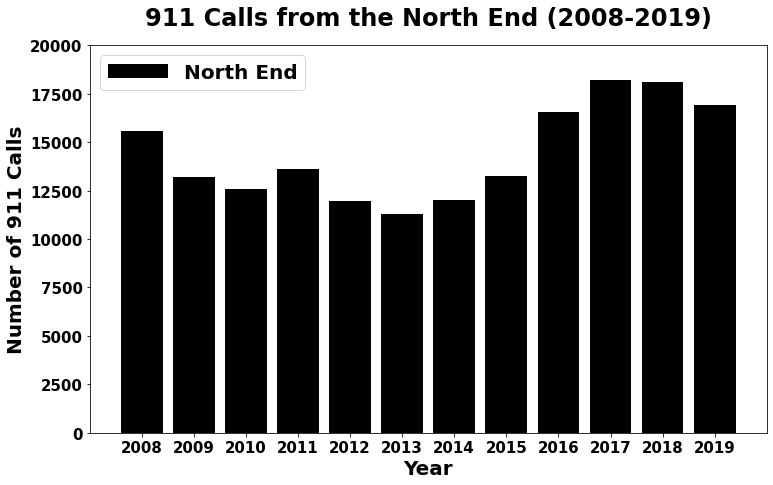

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM NORTH END ##
rc('font', weight='bold')
fig = plt.figure(figsize=(11, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Bar plot
plt.bar(years, totalA, color='k')

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from the North End (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Number of 911 Calls', weight='bold', size=20) # Label y-axis


# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 20000) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['North End'], loc='upper left', handlelength=3, prop={'size':20})
plt.tight_layout()

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_NE.png")

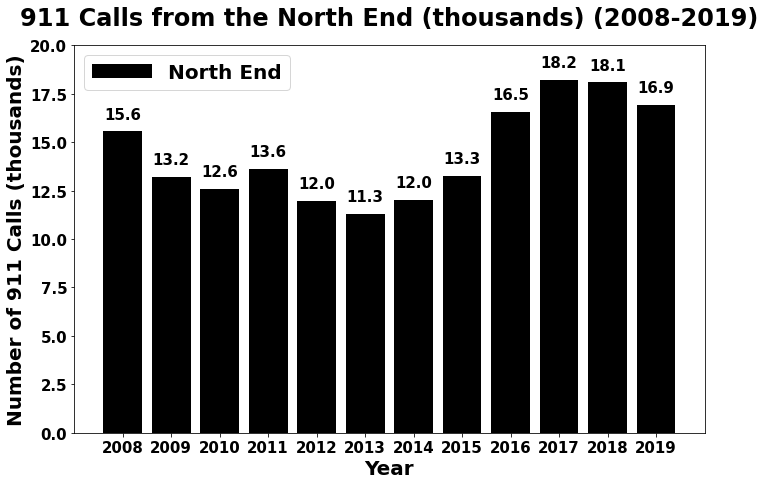

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM NORTH END (thousands) ##
rc('font', weight='bold')
fig = plt.figure(figsize=(11, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Scale y-axis
tot = totalA / 1000

# Bar plot
plt.bar(years, tot, width=0.8, color='k')

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from the North End (thousands) (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Number of 911 Calls (thousands)', weight='bold', size=20) # Label y-axis


# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 20) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['North End'], loc='upper left', handlelength=3, prop={'size':20})
plt.tight_layout()

# Annotate bars with values
for i in range(len(years)):
    plt.annotate(str(round(tot[i], 1)), xy=(years[i],tot[i]+0.5), ha='center', va='bottom', weight='bold', size=15)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_NE_scaled.png")

# 911 Calls from Springfield

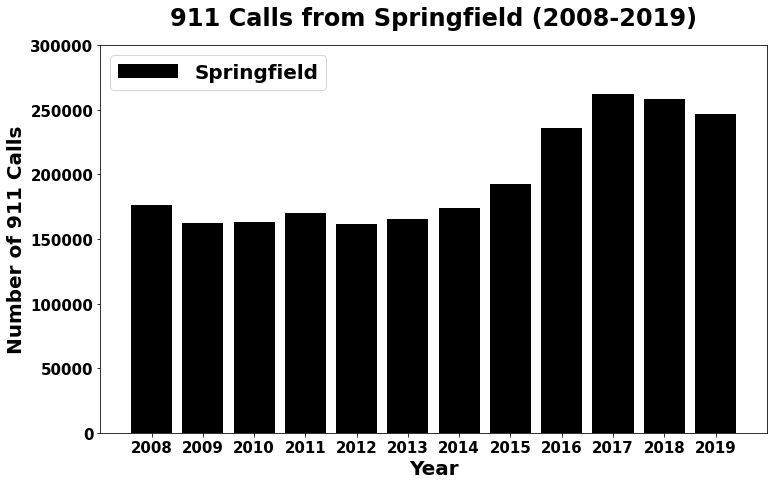

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM SPRINGFIELD ONLY ##
rc('font', weight='bold')
fig = plt.figure(figsize=(11, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Subtract North End Data
tot = totalC - totalA

# Bar plot
plt.bar(years, tot, color='k')

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from Springfield (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Number of 911 Calls', weight='bold', size=20) # Label y-axis


# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 300000) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['Springfield'], loc='upper left', handlelength=3, prop={'size':20})
plt.tight_layout()

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_C.png")

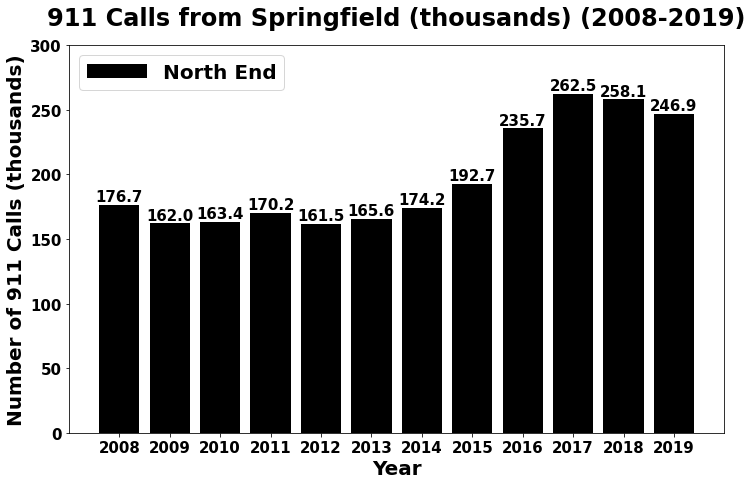

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM SPRINGFIELD ONLY (thousands, annotated) ##
rc('font', weight='bold')
fig = plt.figure(figsize=(11, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Subtract North End Data
tot = (totalC - totalA) / 1000

# Bar plot
plt.bar(years, tot, color='k')

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from Springfield (thousands) (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Number of 911 Calls (thousands)', weight='bold', size=20) # Label y-axis


# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 300) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['North End'], loc='upper left', handlelength=3, prop={'size':20})
plt.tight_layout()

# Annotate bars with values
for i in range(len(years)):
    plt.annotate(str(round(tot[i], 1)), xy=(years[i],tot[i]+0.5), ha='center', va='bottom', weight='bold', size=15)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_C_scaled.png")

# Percent of 911 Calls in Springfield from the North End

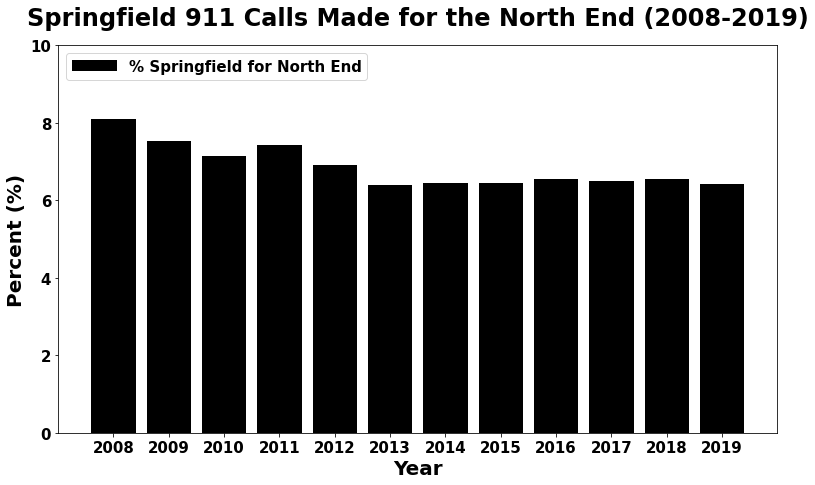

In [ ]:
## FIGURE GENERATION: PERCENT OF SPRINGFIELD 911 CALLS FROM THE NORTH END ##
rc('font', weight='bold')
fig = plt.figure(figsize=(12, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Data
tot = (totalA / totalC) * 100

# Bar plot
plt.bar(years, tot, color='k')

# Figure Aesthetics: title and axis labels
plt.title('Springfield 911 Calls Made for the North End (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Percent (%)', weight='bold', size=20) # Label y-axis


# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 10) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['% Springfield for North End'], loc='upper left', handlelength=3, prop={'size':15})
plt.tight_layout()

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_percent.png")

# 911 Calls from the North End and Springfield: twin, twin scaled, split, one axis

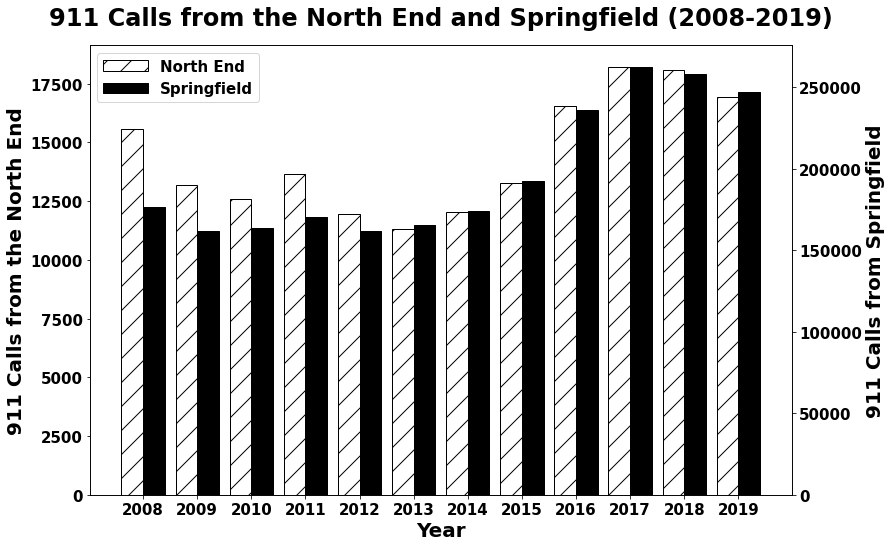

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM THE NORTH END AND SPRINGFIELD: twin axis ##
rc('font', weight='bold', size=15)
fig = plt.figure(figsize=(12, 7))  ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1; ax1 = North End; ax2 = Springfield

# Subtract North End Data from Springfield
totC = (totalC - totalA)

# North End bars are hatched
ax1.bar(years, list(totalA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') 
# Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge')

# Figure Aesthetics: manual legend
ne_bar, ne_lab = ax1.get_legend_handles_labels()
s_bar, s_lab = ax2.get_legend_handles_labels()
ax2.legend(ne_bar + s_bar, ne_lab + s_lab, loc='best', handlelength=3, prop={'size':15})
plt.tight_layout()

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from the North End and Springfield (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot title
ax1.set_ylabel('911 Calls from the North End', weight='bold', size=20) # Label North End y-axis
ax2.set_ylabel('911 Calls from Springfield', weight='bold', size=20) # Label Springfield y-axis
ax1.set_xlabel("Year", weight='bold', size=20) # Label x-axis

# Figure Aesthetics: ticks
ax1.set_xticks(list(years))
ax2.set_xticks(list(years))

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_both_twin.png")

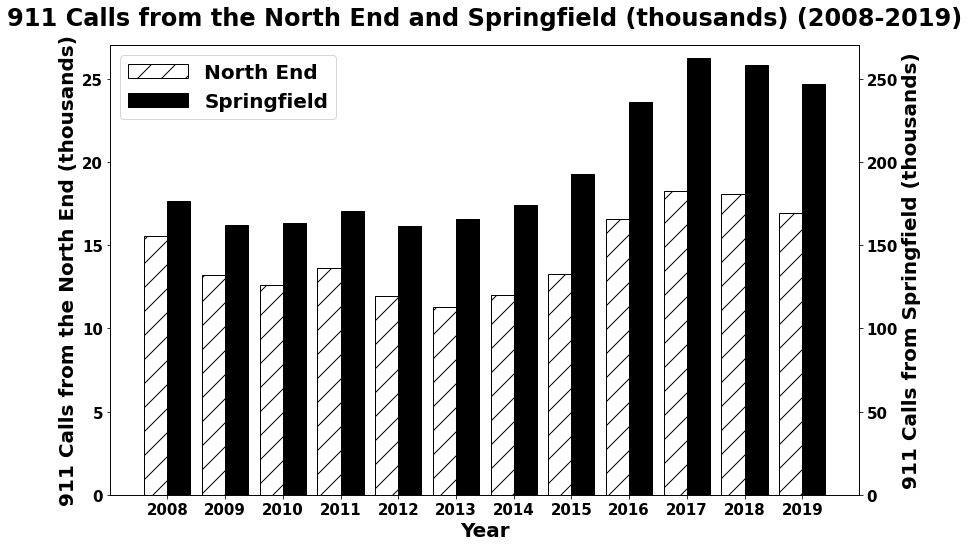

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM THE NORTH END AND SPRINGFIELD: twin axis (scaled) ##
rc('font', weight='bold', size=15)
fig = plt.figure(figsize=(12, 7))  ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1; ax1 = North End; ax2 = Springfield

# Subtract North End Data from Springfield + Scale
totA = totalA / 1000
totC = (totalC - totalA) / 1000

# North End bars are hatched
ax1.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') 
# Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge')

# Figure Aesthetics: manual legend
ne_bar, ne_lab = ax1.get_legend_handles_labels()
s_bar, s_lab = ax2.get_legend_handles_labels()
ax2.legend(ne_bar + s_bar, ne_lab + s_lab, loc='best', handlelength=3, prop={'size':20})
plt.tight_layout()

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from the North End and Springfield (thousands) (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot title
ax1.set_ylabel('911 Calls from the North End (thousands)', weight='bold', size=20) # Label North End y-axis
ax2.set_ylabel('911 Calls from Springfield (thousands)', weight='bold', size=20) # Label Springfield y-axis
ax1.set_xlabel("Year", weight='bold', size=20) # Label x-axis

# Figure Aesthetics: ticks
ax1.set_xticks(list(years))
ax2.set_xticks(list(years))
ax1.set_ylim(0, 27)
ax2.set_ylim(0, 270)
# Annotate bars with values
#for i in range(len(years)):
#    ax1.annotate(str(round(totA[i])), xy=(years[i] -0.2, totA[i] + 0.3), ha='center', va='bottom')
#    ax2.annotate(str(round(totC[i])), xy=(years[i] + 0.2, totC[i] + 0.5), ha='center', va='bottom')

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_both_twin_scaled.png")

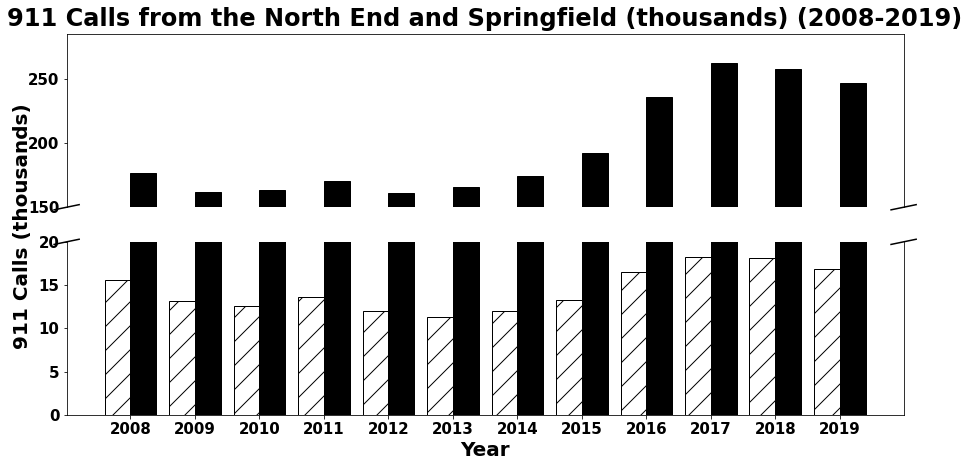

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM THE NORTH END AND SPRINGFIELD: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Subtract North End Data from Springfield + Scale
totA = totalA / 1000
totC = (totalC - totalA) / 1000

# Plot the same data on both axes
ax1.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End2
ax1.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield2




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.07, 0.91, '911 Calls from the North End and Springfield (thousands) (2008-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.075, 0.5, '911 Calls (thousands)', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis

# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['North End', 'Springfield'], handlelength=3, prop={'size':15})

# Figure Aesthetics: view different portions of the data
ax1.set_ylim(150, 285)
ax2.set_ylim(0, 20)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_both_split_scaled.png")

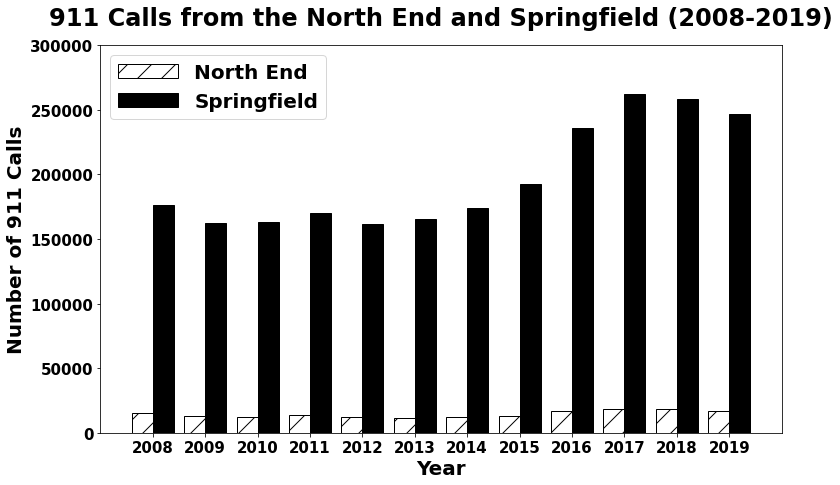

In [ ]:
## FIGURE GENERATION: 911 CALLS FROM THE NORTH END AND SPRINGFIELD ##
rc('font', weight='bold')
fig = plt.figure(figsize=(12, 7)) ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax = fig.add_subplot(111)

# Subtract North End Data
totA = totalA
totC = totalC - totalA

# Plot
ax.bar(years, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax.bar(years, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black

# Figure Aesthetics: title and axis labels
plt.title('911 Calls from the North End and Springfield (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot Title
plt.xlabel('Year', weight='bold', size=20) # Label x-axis
plt.ylabel('Number of 911 Calls', weight='bold', size=20) # Label y-axis

# Figure Aesthetics: ticks
plt.xticks(years, weight='bold', fontweight='bold', fontsize=15) # Ensures all years are displayed; set size of X-ticks
plt.yticks(weight='bold', fontweight='bold', fontsize=15) # Set size of Y-ticks
plt.xlim(2007, 2020) # Sets X-range
plt.ylim(0, 300000) # Sets Y-range

# Figure Aesthetics: legend
plt.legend(['North End', 'Springfield'], loc='upper left', handlelength=3, prop={'size':20})
plt.tight_layout()

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911Calls_both.png")

# Average Time Spent at the Scene

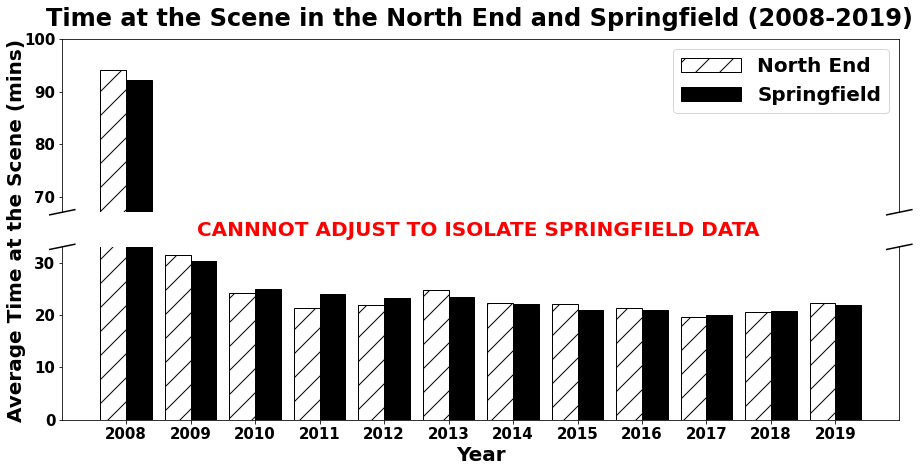

In [ ]:
## FIGURE GENERATION: TIME SPENT AT THE SCENE IN THE NORTH END AND SPRINGFIELD: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Subtract North End Data from Springfield + Scale
totA = timeSpentA
totC = timeSpentC

# Plot the same data on both axes
ax1.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End2
ax1.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield2




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.11, 0.92, 'Time at the Scene in the North End and Springfield (2008-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.074, 0.5, 'Average Time at the Scene (mins)', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis
fig.text(0.25, 0.5, 'CANNNOT ADJUST TO ISOLATE SPRINGFIELD DATA', color='r', weight='bold', size=20, va='center', rotation='horizontal') # NOTE
# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax1.legend(handles, ['North End', 'Springfield'], handlelength=3, prop={'size':20})

# Figure Aesthetics: view different portions of the data
ax1.set_ylim(67, 100)
ax2.set_ylim(0, 33)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/timeSpent_both_split.png")

# Average Time to Arrive to the Scene

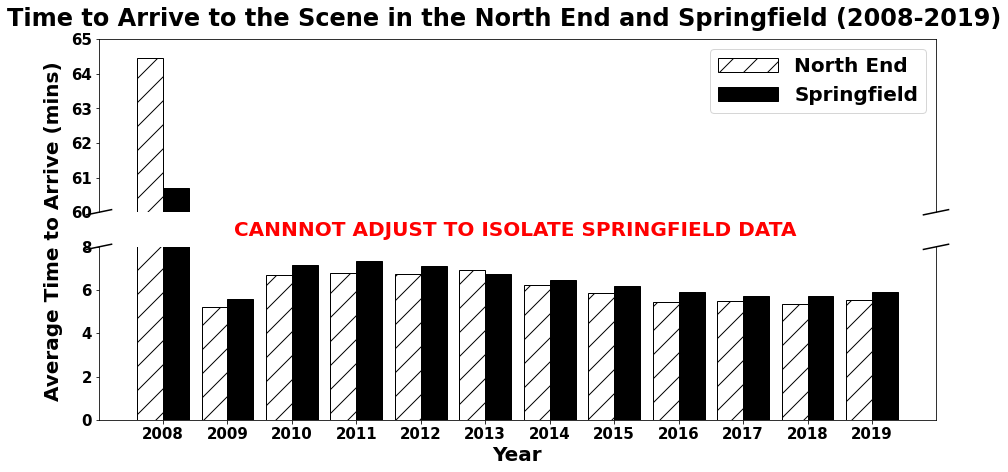

In [ ]:
## FIGURE GENERATION: TIME SPENT AT THE SCENE IN THE NORTH END AND SPRINGFIELD: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Subtract North End Data from Springfield + Scale
totA = timeArriveA
totC = timeArriveC

# Plot the same data on both axes
ax1.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End2
ax1.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield2




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.04, 0.92, 'Time to Arrive to the Scene in the North End and Springfield (2008-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.074, 0.5, 'Average Time to Arrive (mins)', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis
fig.text(0.25, 0.5, 'CANNNOT ADJUST TO ISOLATE SPRINGFIELD DATA', color='r', weight='bold', size=20, va='center', rotation='horizontal') # NOTE
# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax1.legend(handles, ['North End', 'Springfield'], handlelength=3, prop={'size':20})

# Figure Aesthetics: view different portions of the data
ax1.set_ylim(60, 65)
ax2.set_ylim(0, 8)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/timeArrive_both_split.png")

# Crime Category: Crimes against Persons

In [ ]:
## CRIMES AGAINST PERSONS 911 CALLS DATA ##
# Crimes against persons in the North End
ASSAULT_A = df.loc[(df['Call_Reason'] == 'ASSAULT') & (df['Region'] == 'A')].reset_index(drop = True)
ASSAULTwWEAPON_A = df.loc[(df['Call_Reason'] == 'ASSAULT WITH WEAPON') & (df['Region'] == 'A')].reset_index(drop = True)
KIDNAPPING_A = df.loc[(df['Call_Reason'] == 'KIDNAPPING') & (df['Region'] == 'A')].reset_index(drop = True)
SERIOUS_ASSAULT_A = df.loc[(df['Call_Reason'] == 'SERIOUS ASSAULT') & (df['Region'] == 'A')].reset_index(drop = True)
SEX_ASSAULT_A = df.loc[(df['Call_Reason'] == 'SEX ASSAULT') & (df['Region'] == 'A')].reset_index(drop = True)
Stabbing_Victim_A = df.loc[(df['Call_Reason'] == 'Stabbing Victim') & (df['Region'] == 'A')].reset_index(drop = True)
Stalking_A = df.loc[(df['Call_Reason'] == 'Stalking') & (df['Region'] == 'A')].reset_index(drop = True)

# Crimes against persons in Springfield
ASSAULT_C = df.loc[(df['Call_Reason'] == 'ASSAULT') & (df['Region'] == 'C')].reset_index(drop = True)
ASSAULTwWEAPON_C = df.loc[(df['Call_Reason'] == 'ASSAULT WITH WEAPON') & (df['Region'] == 'C')].reset_index(drop = True)
KIDNAPPING_C = df.loc[(df['Call_Reason'] == 'KIDNAPPING') & (df['Region'] == 'C')].reset_index(drop = True)
SERIOUS_ASSAULT_C = df.loc[(df['Call_Reason'] == 'SERIOUS ASSAULT') & (df['Region'] == 'C')].reset_index(drop = True)
SEX_ASSAULT_C = df.loc[(df['Call_Reason'] == 'SEX ASSAULT') & (df['Region'] == 'C')].reset_index(drop = True)
Stabbing_Victim_C = df.loc[(df['Call_Reason'] == 'Stabbing Victim') & (df['Region'] == 'C')].reset_index(drop = True)
Stalking_C = df.loc[(df['Call_Reason'] == 'Stalking') & (df['Region'] == 'C')].reset_index(drop = True)

# Concatenate all crime types to make a pd for all crimes in North End and one for all crimes against persons in Springfield
Persons_A = pd.concat([ASSAULT_A, ASSAULTwWEAPON_A, KIDNAPPING_A, SERIOUS_ASSAULT_A, SEX_ASSAULT_A, Stabbing_Victim_A, Stalking_A], ignore_index=True, sort=False)
Persons_C = pd.concat([ASSAULT_C, ASSAULTwWEAPON_C, KIDNAPPING_C, SERIOUS_ASSAULT_C, SEX_ASSAULT_C, Stabbing_Victim_C, Stalking_C], ignore_index=True, sort=False)

#print(Persons_A)
#print(Persons_C)


# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
persons_A_year =  pd.to_numeric(Persons_A['Year'], downcast="integer").to_frame()
persons_A_year['i'] = persons_A_year.index
total_Persons_A = pd.to_numeric(Persons_A['Total'], downcast="integer").to_frame()
total_Persons_A['i'] = total_Persons_A.index
Persons_A2 = pd.merge(persons_A_year, total_Persons_A).groupby('Year')['Total'].sum()
#print(Persons_A2)

# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
persons_C_year =  pd.to_numeric(Persons_C['Year'], downcast="integer").to_frame()
persons_C_year['i'] = persons_C_year.index
total_Persons_C = pd.to_numeric(Persons_C['Total'], downcast="integer").to_frame()
total_Persons_C['i'] = total_Persons_C.index
Persons_C2 = pd.merge(persons_C_year, total_Persons_C).groupby('Year')['Total'].sum()
#print(Persons_C2)

total_rest_C = Persons_C2 - Persons_A2 # Subtract North End values from rest of Springfield

#print(total_rest_C)

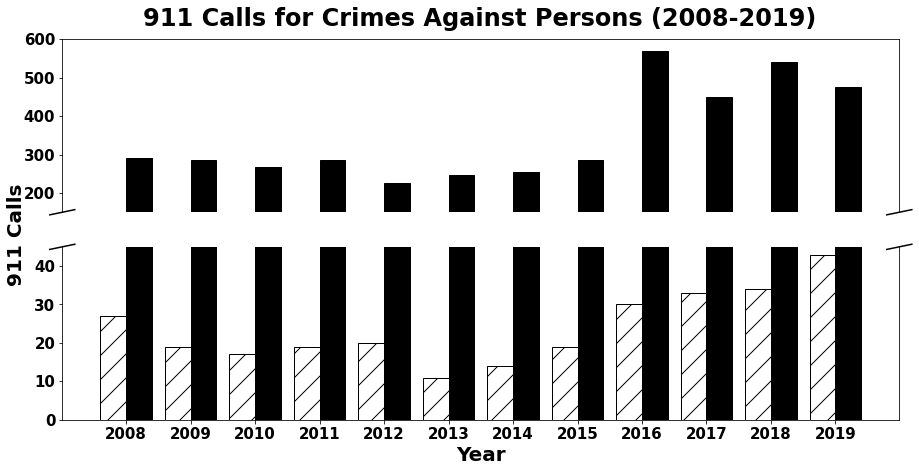

In [ ]:
## FIGURE GENERATION: 911 CALLS ABOUT CRIMES AGAINST PERSONS: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Subtract North End Data from Springfield + Scale
totA = Persons_A2
totC = total_rest_C

# Plot the same data on both axes
ax1.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(years, list(totA), width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End2
ax1.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(years, list(totC), width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield2




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.2, 0.92, '911 Calls for Crimes Against Persons (2008-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.074, 0.5, '911 Calls ', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis

# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['North End', 'Springfield'], handlelength=3, prop={'size':15})

# Figure Aesthetics: view different portions of the data
ax1.set_ylim(150, 600)
ax2.set_ylim(0, 45)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911persons_both_split.png")

# Crime Category: Crimes against society

In [ ]:
# Crimes Against Society
cp_A = df.loc[(df['Call_Reason'] == 'Child Exploitation/Pornography') & (df['Region'] == 'A')].reset_index(drop = True)
indecency_A = df.loc[(df['Call_Reason'] == 'Public Indecency') & (df['Region'] == 'A')].reset_index(drop = True)

cp_C = df.loc[(df['Call_Reason'] == 'Child Exploitation/Pornography') & (df['Region'] == 'C')].reset_index(drop = True)
indecency_C = df.loc[(df['Call_Reason'] == 'Public Indecency') & (df['Region'] == 'C')].reset_index(drop = True)

# Concatenate all crime types to make a pd for all crimes in North End and one for all crimes against persons in Springfield
Society_A = pd.concat([cp_A, indecency_A], ignore_index=True, sort=False)
Society_C = pd.concat([cp_C, indecency_C], ignore_index=True, sort=False)

#print(Society_A)
#print(Society_C)
# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
society_A_year = pd.to_numeric(Society_A['Year'], downcast="integer").to_frame()
society_A_year['i'] = society_A_year.index
total_Society_A = pd.to_numeric(Society_A['Total'], downcast="integer").to_frame()
total_Society_A['i'] = total_Society_A.index
Society_A2 = pd.merge(society_A_year, total_Society_A).groupby('Year')['Total'].sum()

Society_A2_year = (pd.to_numeric(Society_A['Year'], downcast="integer").to_frame()).drop_duplicates()
#print(Society_A2_year)
#print(Society_A2_year.Year)

# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
society_C_year =  pd.to_numeric(Society_C['Year'], downcast="integer").to_frame()
society_C_year['i'] = society_C_year.index
total_Society_C = pd.to_numeric(Society_C['Total'], downcast="integer").to_frame()
total_Society_C['i'] = total_Society_C.index
Society_C2 = pd.merge(society_C_year, total_Society_C).groupby('Year')['Total'].sum()

Society_C2_year = (pd.to_numeric(Society_C['Year'], downcast="integer").to_frame()).drop_duplicates()

#print(Society_C2)

total_rest_society_C = Society_C2 - Society_A2 # Subtract North End values from rest of Springfield

#print(total_rest__society_C)

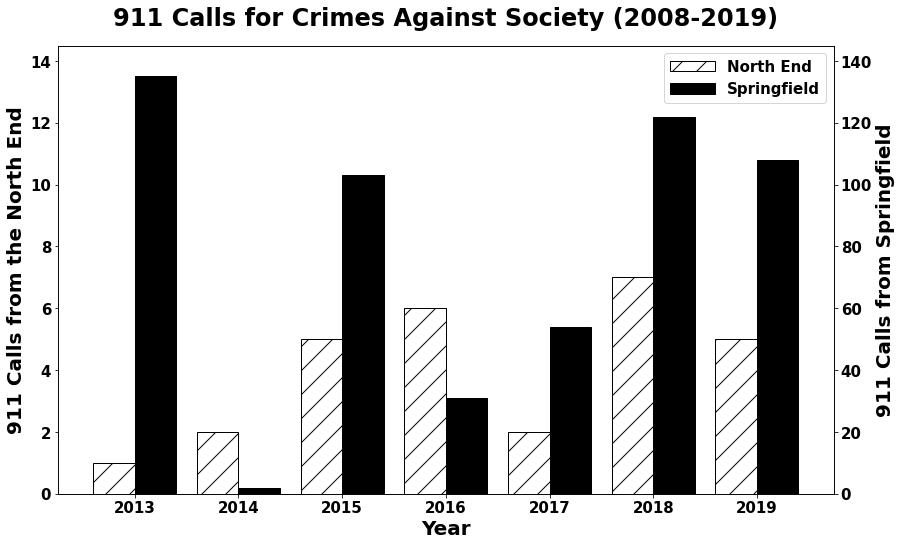

In [ ]:
## FIGURE GENERATION: 911 CALLS ABOUT CRIMES AGAINST SOCIETY: twin axis ##
rc('font', weight='bold', size=15)
fig = plt.figure(figsize=(12, 7))  ## ADJUST FROM 11 FOR A WIDER FIGURE ##
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1; ax1 = North End; ax2 = Springfield

# Data
totA = Society_A2  # 911 Calls for Crimes against society from the North End
totC = total_rest_society_C # 911 Calls for Crimes against society from Springfield
yearA = Society_A2_year.Year # Years with data from the North End
yearC = Society_C2_year.Year # Years with data from Springfield

# Plot
ax1.bar(yearA, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(yearC, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black

# Figure Aesthetics: manual legend
ne_bar, ne_lab = ax1.get_legend_handles_labels()
s_bar, s_lab = ax2.get_legend_handles_labels()
ax2.legend(ne_bar + s_bar, ne_lab + s_lab, loc='best', handlelength=3, prop={'size':15})
plt.tight_layout()

# Figure Aesthetics: title and axis labels
plt.title('911 Calls for Crimes Against Society (2008-2019)', weight='bold', color='k', pad=20, size=24) # Plot title
ax1.set_ylabel('911 Calls from the North End', weight='bold', size=20) # Label North End y-axis
ax2.set_ylabel('911 Calls from Springfield', weight='bold', size=20) # Label Springfield y-axis
ax1.set_xlabel("Year", weight='bold', size=20) # Label x-axis

# Figure Aesthetics: ticks
ax1.set_xticks(yearC)
ax2.set_xticks(yearC)
ax1.set_ylim(0, 14.5)
ax2.set_ylim(0, 145)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911society_both_twin.png")

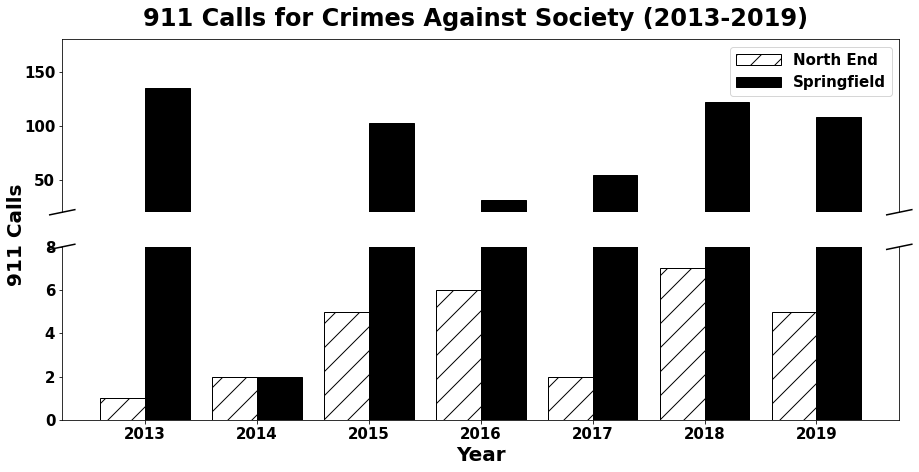

In [ ]:
## FIGURE GENERATION: 911 CALLS ABOUT CRIMES AGAINST SOCIETY: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Data
totA = Society_A2  # 911 Calls for Crimes against society from the North End
totC = total_rest_society_C # 911 Calls for Crimes against society from Springfield
yearA = Society_A2_year.Year # Years with data from the North End
yearC = Society_C2_year.Year # Years with data from Springfield

# Plot the same data on both axes
ax1.bar(yearA, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(yearA, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax1.bar(yearC, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(yearC, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.2, 0.92, '911 Calls for Crimes Against Society (2013-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.074, 0.5, '911 Calls ', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis

# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax1.legend(handles, ['North End', 'Springfield'], loc='upper right', handlelength=3, prop={'size':15})

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(20, 180)
ax2.set_ylim(0, 8)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911society_both_split.png")

# Crime Category: Crimes Against Property


In [ ]:
# Separate the Data
# Crimes against property in the North End
ARMED_ROBBERY_A = df.loc[(df['Call_Reason'] == 'ARMED ROBBERY') & (df['Region'] == 'A')].reset_index(drop = True)
ARSON_A = df.loc[(df['Call_Reason'] == 'ARSON & BOMBING') & (df['Region'] == 'A')].reset_index(drop = True)
BnE_A = df.loc[(df['Call_Reason'] == 'BREAKING & ENTERING') & (df['Region'] == 'A')].reset_index(drop = True)
BnE_VEHICLE_A = df.loc[(df['Call_Reason'] == 'BREAKING ENTERING VEHICLE') & (df['Region'] == 'A')].reset_index(drop = True)
CAR_JACKING_A = df.loc[(df['Call_Reason'] == 'CAR JACKING') & (df['Region'] == 'A')].reset_index(drop = True)
Fraud_A = df.loc[(df['Call_Reason'] == 'Fraud') & (df['Region'] == 'A')].reset_index(drop = True)
LARCENY_A = df.loc[(df['Call_Reason'] == 'LARCENY') & (df['Region'] == 'A')].reset_index(drop = True)
ROBBERY_A = df.loc[(df['Call_Reason'] == 'ROBBERY') & (df['Region'] == 'A')].reset_index(drop = True)
STOLEN_VEHICLE_A = df.loc[(df['Call_Reason'] == 'STOLEN VEHICLE') & (df['Region'] == 'A')].reset_index(drop = True)
Tresspass_A = df.loc[(df['Call_Reason'] == 'Tresspass') & (df['Region'] == 'A')].reset_index(drop = True)
UNARMED_ROBBERY_A = df.loc[(df['Call_Reason'] == 'UNARMED ROBBERY') & (df['Region'] == 'A')].reset_index(drop = True)
VANDALISM_A = df.loc[(df['Call_Reason'] == 'VANDALISM') & (df['Region'] == 'A')].reset_index(drop = True)

# Crimes against property in Springfield
ARMED_ROBBERY_C = df.loc[(df['Call_Reason'] == 'ARMED ROBBERY') & (df['Region'] == 'C')].reset_index(drop = True)
ARSON_C = df.loc[(df['Call_Reason'] == 'ARSON & BOMBING') & (df['Region'] == 'C')].reset_index(drop = True)
BnE_C = df.loc[(df['Call_Reason'] == 'BREAKING & ENTERING') & (df['Region'] == 'C')].reset_index(drop = True)
BnE_VEHICLE_C = df.loc[(df['Call_Reason'] == 'BREAKING ENTERING VEHICLE') & (df['Region'] == 'C')].reset_index(drop = True)
CAR_JACKING_C = df.loc[(df['Call_Reason'] == 'CAR JACKING') & (df['Region'] == 'C')].reset_index(drop = True)
Fraud_C = df.loc[(df['Call_Reason'] == 'Fraud') & (df['Region'] == 'C')].reset_index(drop = True)
LARCENY_C = df.loc[(df['Call_Reason'] == 'LARCENY') & (df['Region'] == 'C')].reset_index(drop = True)
ROBBERY_C = df.loc[(df['Call_Reason'] == 'ROBBERY') & (df['Region'] == 'C')].reset_index(drop = True)
STOLEN_VEHICLE_C = df.loc[(df['Call_Reason'] == 'STOLEN VEHICLE') & (df['Region'] == 'C')].reset_index(drop = True)
Tresspass_C = df.loc[(df['Call_Reason'] == 'Tresspass') & (df['Region'] == 'C')].reset_index(drop = True)
UNARMED_ROBBERY_C = df.loc[(df['Call_Reason'] == 'UNARMED ROBBERY') & (df['Region'] == 'C')].reset_index(drop = True)
VANDALISM_C = df.loc[(df['Call_Reason'] == 'VANDALISM') & (df['Region'] == 'C')].reset_index(drop = True)


# Concatenate all crime types to make a pd for all crimes in North End and one for all crimes against persons in Springfield
Prop_A = pd.concat([ARMED_ROBBERY_A, ARSON_A, BnE_A, BnE_VEHICLE_A, CAR_JACKING_A, Fraud_A, LARCENY_A, ROBBERY_A, STOLEN_VEHICLE_A, Tresspass_A, UNARMED_ROBBERY_A, VANDALISM_A], ignore_index=True, sort=False)
Prop_C = pd.concat([ARMED_ROBBERY_C, ARSON_C, BnE_C, BnE_VEHICLE_C, CAR_JACKING_C, Fraud_C, LARCENY_C, ROBBERY_C, STOLEN_VEHICLE_C, Tresspass_C, UNARMED_ROBBERY_C, VANDALISM_C], ignore_index=True, sort=False)

#print(Prop_A)
#print(Prop_C)


# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
Prop_A_year =  pd.to_numeric(Prop_A['Year'], downcast="integer").to_frame()
Prop_A_year['i'] = Prop_A_year.index
totProp_A = pd.to_numeric(Prop_A['Total'], downcast="integer").to_frame()
#print(totProp_A)
totProp_A['i'] = totProp_A.index
Prop_A2 = pd.merge(Prop_A_year, totProp_A).groupby('Year')['Total'].sum()
#print(Prop_A2)

Prop_A2_year = (pd.to_numeric(Prop_A['Year'], downcast="integer").to_frame()).drop_duplicates()

# Change data type of Years and Total to integer, keeping index, merge together and sum to yield total crimes in the area per year
Prop_C_year =  pd.to_numeric(Prop_C['Year'], downcast="integer").to_frame()
Prop_C_year['i'] = Prop_C_year.index
totProp_C = pd.to_numeric(Prop_C['Total'], downcast="integer").to_frame()
#print(totProp_C)
totProp_C['i'] = totProp_C.index
Prop_C2 = pd.merge(Prop_C_year, totProp_C).groupby('Year')['Total'].sum()
#print(Prop_C2)

Prop_C2_year = (pd.to_numeric(Prop_C['Year'], downcast="integer").to_frame()).drop_duplicates()

totProp_rest_C = Prop_C2 - Prop_A2 # Subtract North End values from rest of Springfield

#print(total_rest_C)

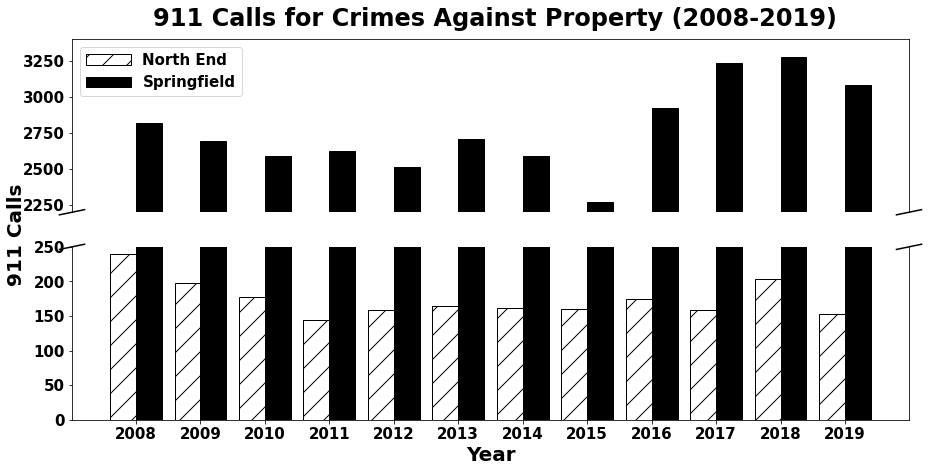

In [ ]:
## FIGURE GENERATION: 911 CALLS ABOUT CRIMES AGAINST SOCIETY: split axis ##
rc('font', weight='bold', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

# Data
totA = Prop_A2  # 911 Calls for Crimes against property from the North End
totC = totProp_rest_C # 911 Calls for Crimes against property from Springfield
yearA = Prop_A2_year.Year # Years with data from the North End
yearC = Prop_C2_year.Year # Years with data from Springfield

# Plot the same data on both axes
ax1.bar(yearA, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax2.bar(yearA, totA, width=-0.4, color='white', label='North End', edgecolor='black', hatch='/', align='edge') # North End bars are hatched
ax1.bar(yearC, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black
ax2.bar(yearC, totC, width=0.4, color='black', label='Springfield', edgecolor='black', hatch='/', align='edge') # Springfield bars are solid black




## SPLIT AXIS CODE: START ##
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(years)
plt.xticks(weight='bold')

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
## SPLIT AXIS CODE: END ##




# Figure Aesthetics: title and axis labels
fig.text(0.2, 0.92, '911 Calls for Crimes Against Property (2008-2019)', weight='bold', size=24, va='center', rotation='horizontal') # Plot title
ax2.set_xlabel("Year", weight='bold', size=20) # Label X-axis
fig.text(0.065, 0.5, '911 Calls ', weight='bold', size=20, va='center', rotation='vertical') # Label Y-axis

# Figure Aesthetics: legend
handles, labels = ax.get_legend_handles_labels()
ax1.legend(handles, ['North End', 'Springfield'], loc='upper left', handlelength=3, prop={'size':15})

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(2200, 3400)
ax2.set_ylim(0, 250)

# Save figure to respective folder
images_dir = '/content/drive/MyDrive/ES96/Team One/Data/911 Calls & Time @ Scene'
plt.savefig(f"{images_dir}/911prop_both_split.png")

# Potential Graphs

With respect to:


*   Total calls
*   Ave Arrive time
*   Ave Time @ Scene


**Crimes vs person:** 'ASSAULT', 'ASSAULT WITH WEAPON', 'KIDNAPPING', 'SERIOUS ASSAULT', 'SEX ASSAULT', 'Stabbing Victim', 'Stalking'

**Crimes vs prop:** 'ARMED ROBBERY', 'ARSON & BOMBING', 'BREAKING & ENTERING', 'BREAKING ENTERING VEHICLE', 'CAR JACKING', 'Fraud', 'LARCENY', 'ROBBERY', 'STOLEN VEHICLE', 'Tresspass', 'UNARMED ROBBERY', 'VANDALISM', 

**Crimes vs society:** 'Child Exploitation/Pornography', 'Public Indecency'

**Victims:** 'Gunshot Victim', 'Psychiatric Behavior(Suicidal)', 'Stabbing Victim'

** Reports?:** 'REPORT ASSAULT ALTERNATE', 'REPORT B&E MV ALTERNATE', 'REPORT DUMPING ALTERNATE', 'REPORT HARASS CALLS ALTERNATE', 'REPORT LARCENY ALTERNATE', 'Report on Assault', 'REPORT ON BREAK TO BUSINESS', 'REPORT ON BREAK TO DWELLING', 'REPORT ON BREAK TO VEHICLE', 'REPORT ON LARCENY', 'REPORT ON SERIOUS ASSAULT', 'Report on Stabbing/Gunshot Vic', 'REPORT ON STOLEN VEHICLE', 'REPORT ON VANDALISM', 'REPORT ON VANDALISM ALTERNATE', 

**Other:** 'Shot Spotter', 'SHOTS FIRED' 'Overdose/Medical Assist', 'SUSPICIOUS ACTIVITY', 'SUSPICIOUS Mail-Item', 'SUSPICIOUS MOTOR VEHICLE', 'SUSPICIOUS PERSON'
